# 1.	Hitunglah PageRank dari graph berikut

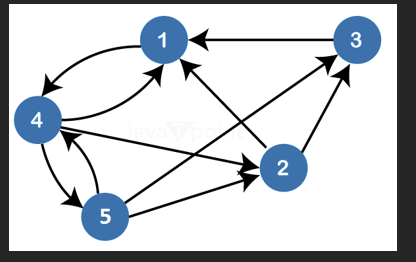

In [16]:
import numpy as np

# jumlah node
N = 5

# Damping factor
d = 0.85

# matrix
A = np.array([
    [0, 0, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 0, 1],
    [1, 1, 1, 0, 1],
    [1, 0, 0, 1, 0]
])

# derajat keluar (jumlah tepi keluar untuk setiap node)
outdegree = np.sum(A, axis=1)

# Initialisasi PageRank value
PR = np.ones(N) / N

# PageRank
def pagerank(A, PR, d, outdegree, N, iterations=100, tol=1.0e-6):
    for i in range(iterations):
        PR_new = np.ones(N) * (1 - d) / N + d * A.T.dot(PR / outdegree)
        if np.linalg.norm(PR_new - PR) < tol:
            break
        PR = PR_new
    return PR_new

# Calculate PageRank
pagerank = pagerank(A, PR, d, outdegree, N)

print("Hasil akhir : ",pagerank)

Hasil akhir :  [0.21266048 0.15006931 0.16997363 0.22508389 0.24221269]


# 2.	Carilah penyelesaian dari Sistem persamaan berikut  dengan Eliminasi Gauss

\begin{split}
x_1 - x_2 +x_3  =  3 \\
2x_1 + x_2 + x_3  =  8\\
6x_1 + x_2 - x_3  =  4\\
\end{split}

In [17]:
import numpy as np
A=np.array([[1, -1, 1,3],[2, 1, 3,8],[6, 0, -1,4]])
print(A)

[[ 1 -1  1  3]
 [ 2  1  3  8]
 [ 6  0 -1  4]]


In [18]:
import numpy as np

def RowSwap(A,k,l):
# =============================================================================
#     A is a NumPy array.  RowSwap will return duplicate array with rows
#     k and l swapped.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        temp = B[k][j]
        B[k][j] = B[l][j]
        B[l][j] = temp

    return B

def RowScale(A,k,scale):
# =============================================================================
#     A is a NumPy array.  RowScale will return duplicate array with the
#     entries of row k multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[k][j] *= scale

    return B

def RowAdd(A,k,l,scale):
# =============================================================================
#     A is a numpy array.  RowAdd will return duplicate array with row
#     l modifed.  The new values will be the old values of row l added to
#     the values of row k, multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[l][j] += B[k][j]*scale

    return B

def back_substitution(aug_matrix):
    n = len(aug_matrix)
    x = np.zeros(n)

    for i in range(n - 1, -1, -1):
        x[i] = aug_matrix[i, -1] - np.sum(aug_matrix[i, i + 1:-1] * x[i + 1:])

    return x


In [19]:
B1 = RowSwap(A,0,2)
B2 = RowScale(A,2,0.5)
B3 = RowAdd(A,0,1,2)

print(A)
print('\n')
print(B2)

[[ 1 -1  1  3]
 [ 2  1  3  8]
 [ 6  0 -1  4]]


[[ 1.  -1.   1.   3. ]
 [ 2.   1.   3.   8. ]
 [ 3.   0.  -0.5  2. ]]


In [ ]:
print("Pindahkan Baris 1 ke 3")
A1 = RowSwap(A, 0, 2)
print(A1)
print('\n')
print("Kalikan 0,16666666666666666 ke baris")
A2 = RowScale(A1, 0, 0.16666666666666666)
print(A2)
print('\n')
print("tambahkan -2 kali baris 0 ke baris 2")
A3 = RowAdd(A2, 0, 1, -2)
print(A3)
print('\n')
print("Tambahkan -1 kali baris 0 ke baris 2")
A4 = RowAdd(A3, 0, 2, -1)
print(A4)
print('\n')
print("Kalikan 1 ke baris 1 ")
A5 = RowScale(A4, 1, 1)
print(A5)
print('\n')
print("Tambahkan 1 kali baris 2 ke baris 3")
A6 = RowAdd(A5, 1,2,1)
print(A6)
print('\n')
print("Kalikan 0.2222222222222222 ke baris 3 ")
A7 = RowScale(A6, 2,0.2222222222222222)
print(A7)
print('\n')
print("Hasil Akhir dari Eliminasi Gauss")
print(A7,"\n")
print("Pembuktian")
x3 = 2
x2 = 6.66666667 -(3.33333333 *x3)
x1 = 0.66666667-(x3*-0.16666667)-x2
print('x3:',x3)
print('x2:',round(x2))
print('x1:',round(x1))

